In [8]:
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_MIN_ICE_1m_20020101_20031231.nc']


In [9]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



Dsopt=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc')



minice=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_ice_y2002m09.nc')
minice=minice.variables['ileadfra'][:]

minice_=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc')
minice_=minice_.variables['ileadfra'][:]

In [10]:
nasa=nc.Dataset('/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc')

In [11]:
print nasa.variables
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]
nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][:]
print nasa_ice.shape,nasa_lat.min(),nasa_lat.max()

OrderedDict([(u'projection', <netCDF4.Variable object at 0x7fa626ece808>), (u'seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fa626ece8a0>), (u'stdev_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fa626ece938>), (u'melt_onset_day_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fa626ece9d0>), (u'qa_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7fa626ecea68>), (u'goddard_merged_seaice_conc_monthly', <netCDF4.Variable object at 0x7fa626eceb00>), (u'goddard_nt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fa626eceb98>), (u'goddard_bt_seaice_conc_monthly', <netCDF4.Variable object at 0x7fa626ecec30>), (u'time', <netCDF4.Variable object at 0x7fa626ececc8>), (u'ygrid', <netCDF4.Variable object at 0x7fa626eced60>), (u'xgrid', <netCDF4.Variable object at 0x7fa626ecedf8>), (u'latitude', <netCDF4.Variable object at 0x7fa626ecee90>), (u'longitude', <netCDF4.Variable object at 0x7fa626ecef28>)])
(1, 448, 304) 31.1026717524 89.8368159996


In [12]:
Susan_lon=[-109,0.,-150,0]
Susan_lat=[86,80,75,87]

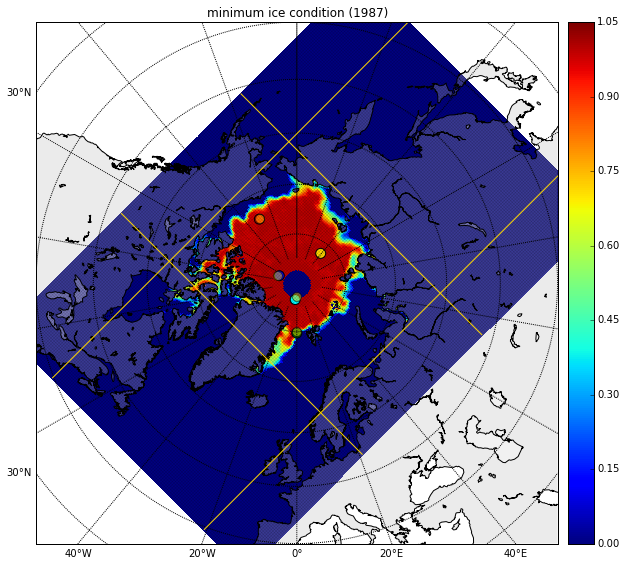

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)
x,y = m(nasa_lon,nasa_lat)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)

a=[217,240,265,245,200]
b=[90,138,185,163,150]
col=['red','blue','green','cyan','gold']
m.scatter(x[a,b],y[a,b],c=col,s=100)


s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)

plt.title('minimum ice condition (1987)')

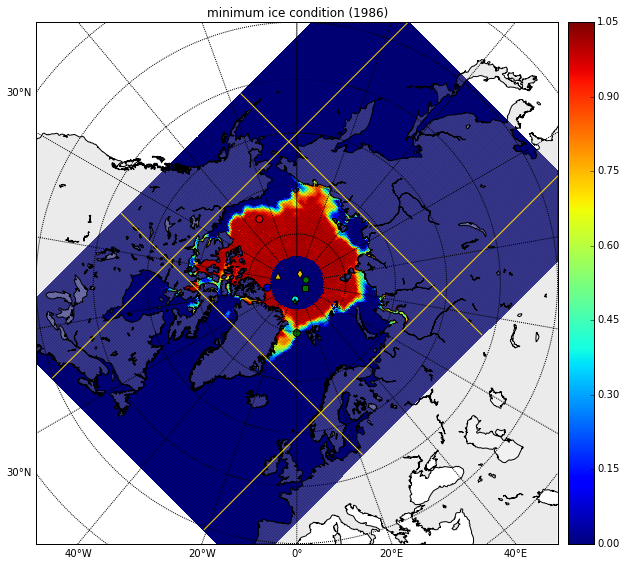

In [14]:
nasa=nc.Dataset('/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc')
nasa_ice=nasa.variables['goddard_merged_seaice_conc_monthly'][:]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

# Susan's interested location
s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=80,alpha=0.5)


#find grid points
x,y = m(nasa_lon,nasa_lat)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)
    
a=[217,255,265,245]
b=[90,138,185,163]
col=['red','blue','green','cyan']
m.scatter(x[a,b],y[a,b],c=col,s=50)


# station data
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
for j in  ([0,5,6,7,8]):
    data=pd.read_csv(nc_filename_[j])
    lon_ = data['long.'];
    lat_ = data['lat.']; 
    y_lon, yy_lat = m(lon_[0], lat_[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40)
    i+=1

plt.title('minimum ice condition (1986)')

In [25]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*09_*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_197909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198209_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198309_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198409_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198509_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198809_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly

In [16]:
print ice_series

[]


Makarov 0.996364
Fram 0.477273


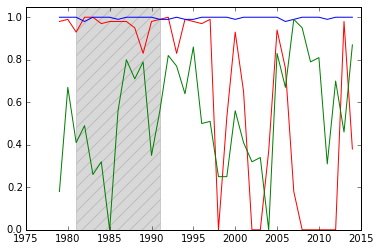

In [17]:
#a merged version of the GSFC NASA Team algorithm and the GSFC Bootstrap sea ice concentrations
ice_series=[]
t=[]
a=[217,255,265,342]#,245]
b=[90,138,185,275]#,163]
col=['red','blue','green','cyan']

for i in range (len(nc_filename)):
    nasa=nc.Dataset(nc_filename[i])
    nasa_ice=nasa.variables['goddard_bt_seaice_conc_monthly'][0,a,b] 
    t.append(i+1979)
    ice_series.append(nasa_ice)



for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])
    

plt.axvspan(1981, 1991, hatch="//",alpha=0.3, color='grey')
plt.ylim(0,1.05)

  
print 'Makarov',np.average(np.array(ice_series)[2:13,1]) #blue
print 'Fram' ,np.average(np.array(ice_series)[2:13,2]) #green

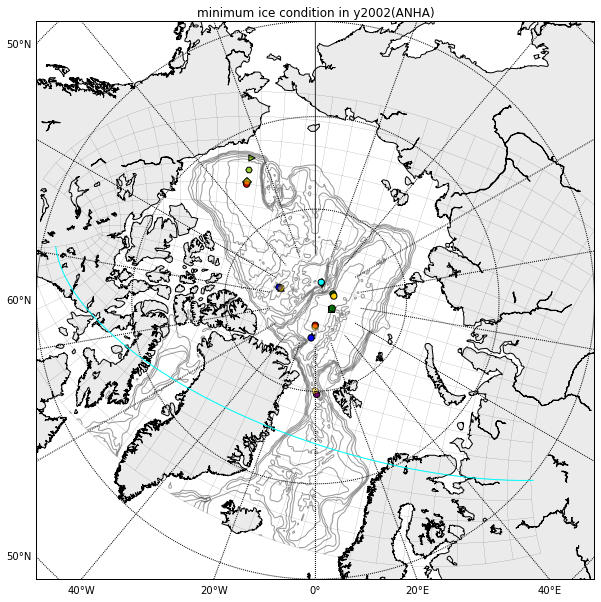

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple',\
     'yellowgreen','yellowgreen','yellowgreen']
mark=['^','s','o','d','*','H','D','>']
i=0
for j in  ([0,5,6,7,8,11,12,13]):
    data=pd.read_csv(nc_filename_[j])
    lon_ = data['long.'];
    lat_ = data['lat.']; 
    y_lon, yy_lat = m(lon_[0], lat_[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40)
    i+=1

x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

a=[300,205,200,223,213,119,178,165]
b=[210,265,323,305,321,335,312,312]
col=['red','blue','green','cyan','gold','purple']
m.scatter(x_lon[a,b],y_lat[a,b],c=col,s=40)

s_lon,s_lat = m(Susan_lon,Susan_lat)
m.scatter(s_lon,s_lat,c='gold',s=40,alpha=0.5)

plt.title('minimum ice condition in y2002(ANHA)')

In [19]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/ANHA4_ENG_ice/*09.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1958m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1959m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1960m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1961m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1962m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1963m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1964m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1965m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1966m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1967m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1968m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1969m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1970m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1971m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4-ENG3_icemod_y1972m09.nc', '/ocean/xiaoxiny/ANHA4_ENG_ice/ANHA4

In [20]:
a=[700,605,519,578]
b=[210,265,335,312]
ice_series=[]
t=[]
for i in range (len(nc_filename)):
    anha=nc.Dataset(nc_filename[i])
    anha_ice=anha.variables['ileadfra']
    t.append(i+1983)
    ice_series.append(anha_ice[0,a,b])

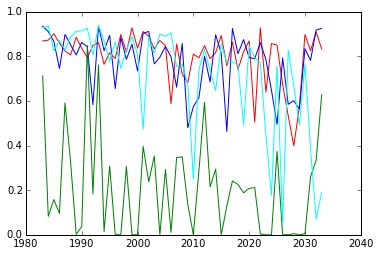

In [21]:
#ANHA
for i in range (len(a)):
    plt.plot(t,np.array(ice_series)[:,i],color=col[i])

In [22]:
# ice concentrations, according to Ariane result

In [26]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/NASA_ice/*09_*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_197909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198209_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198309_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198409_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198509_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f07_198609_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198709_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198809_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_198909_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199009_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly_nh_f08_199109_v02r00.nc', '/ocean/xiaoxiny/NASA_ice/seaice_conc_monthly

0.962
0.828


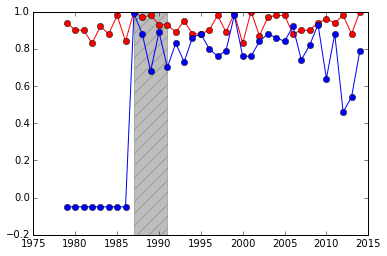

In [44]:
#the GSFC NASA Team algorithm

a=[255,220-35+35]#,245]
b=[138,160]#,163]
col=['red','blue']

for j in range (len(a)):
    ice_series=[]
    t=[]
    for i in range (len(nc_filename)):
        nasa=nc.Dataset(nc_filename[i])
        nasa_ice=nasa.variables['goddard_nt_seaice_conc_monthly'][0,a[j],b[j]] 
        t.append(i+1979)
        ice_series.append(nasa_ice)


    plt.plot(t,np.array(ice_series)[:],'o-',color=col[j])
    plt.axvspan(1979+8, 1991, hatch="//",alpha=0.3, color='grey')
    print np.average(np.array(ice_series)[8:13])
    



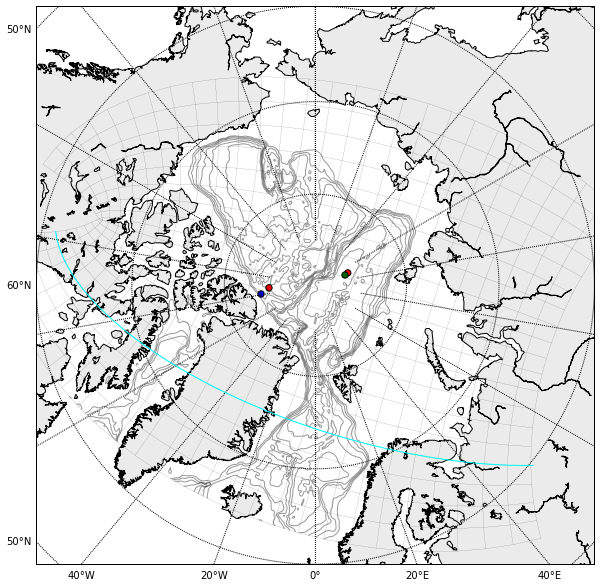

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)

x_lon,y_lat = m(lon,lat)
x,y = m(nasa_lon,nasa_lat)
plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

a=[225,220-35]#400
b=[332,260]
col=['red','red','green','cyan','gold','purple']
m.scatter(x_lon[a,b],y_lat[a,b],c=col,s=40)
m.scatter(x[220-35+35,160],y[220-35+35,160],c='darkgreen',s=40)
m.scatter(x[255,138],y[255,138],s=40)

plt.show()

[0 1] [ 2807.95517357  1061.03240707] -1746.92276649


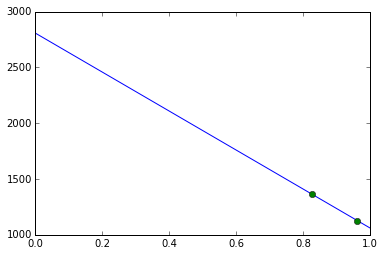

[0 1] [ 0.21145053  0.0213667 ] -0.190083829306


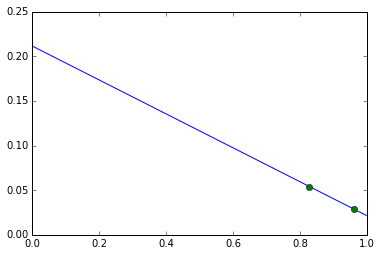

In [45]:
import statsmodels.api as sm


Kvalue__=0.0285898886688
Kvalue_ =0.0540611217958
s__=1127.4154722
s_ =1361.50312291

ice=[0.962,0.828]  
#ice=[0.96,0.5]    #nt
k=[Kvalue__,Kvalue_]
s=[s__,s_]

ice_ = sm.add_constant(ice,prepend=False)
paraK=sm.WLS(k,ice_).fit()
paraS=sm.WLS(s,ice_).fit()




x=np.array([0,1])
y=x*paraS.params[0]+paraS.params[1]
print x,y[:],y[1]-y[0]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(s), 'o')
plt.show()




x=np.array([0,1])
y=x*paraK.params[0]+paraK.params[1]
print x,y[:],y[1]-y[0]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(k), 'o')
plt.show()



[0 1] [ 4213.16174938   383.16812826] -3829.99362112


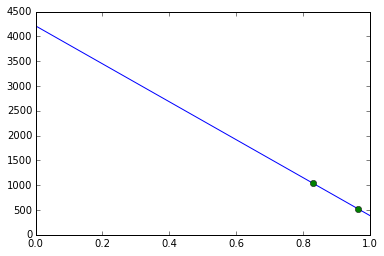

[0 1] [ 0.4710064   0.08683949] -0.384166907978


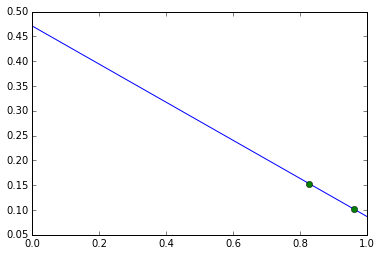

In [46]:
#th
Kvalue__=0.101437832657
Kvalue_ =0.152916198326
s__=528.70788586
s_ =1041.92703109
   
#nt
k=[Kvalue__,Kvalue_]
s=[s__,s_]

ice_ = sm.add_constant(ice,prepend=False)
paraK=sm.WLS(k,ice_).fit()
paraS=sm.WLS(s,ice_).fit()





x=np.array([0,1])
y=x*paraS.params[0]+paraS.params[1]
print x,y[:],y[1]-y[0]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(s), 'o')
plt.show()




x=np.array([0,1])
y=x*paraK.params[0]+paraK.params[1]
print x,y[:],y[1]-y[0]
plt.plot(x,y)
plt.plot(np.array(ice), np.array(k), 'o')
plt.show()

